In [153]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [106]:
import warnings
warnings.filterwarnings('ignore')

In [107]:
cs_data = pd.read_csv(r"C:\Users\HP\Downloads\Unified Mentor\customer_support_tickets.csv")

In [108]:
cs_data

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8464,8465,David Todd,adam28@example.net,22,Female,LG OLED,2021-12-08,Product inquiry,Installation support,My {product_purchased} is making strange noise...,Open,NaN,Low,Phone,NaN,NaN,NaN
8465,8466,Lori Davis,russell68@example.com,27,Female,Bose SoundLink Speaker,2020-02-22,Technical issue,Refund request,I'm having an issue with the {product_purchase...,Open,NaN,Critical,Email,NaN,NaN,NaN
8466,8467,Michelle Kelley,ashley83@example.org,57,Female,GoPro Action Camera,2021-08-17,Technical issue,Account access,I'm having an issue with the {product_purchase...,Closed,Eight account century nature kitchen.,High,Social media,2023-06-01 09:44:22,2023-06-01 04:31:22,3.0
8467,8468,Steven Rodriguez,fpowell@example.org,54,Male,PlayStation,2021-10-16,Product inquiry,Payment issue,I'm having an issue with the {product_purchase...,Closed,We seat culture plan.,Medium,Email,2023-06-01 18:28:24,2023-06-01 05:32:24,3.0


In [109]:
cs_data.head(10)

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0
5,6,Rebecca Fleming,sheenasmith@example.com,53,Male,Microsoft Office,2020-07-28,Cancellation request,Payment issue,I'm facing a problem with my {product_purchase...,Open,NaN,Low,Social media,NaN,NaN,NaN
6,7,Jacqueline Wright,donaldkeith@example.org,24,Other,Microsoft Surface,2020-02-23,Product inquiry,Refund request,I'm unable to access my {product_purchased} ac...,Open,NaN,Critical,Social media,NaN,NaN,NaN
7,8,Denise Lee,joelwilliams@example.com,23,Male,Philips Hue Lights,2020-08-09,Refund request,Battery life,I'm having an issue with the {product_purchase...,Open,NaN,Critical,Social media,NaN,NaN,NaN
8,9,Nicolas Wilson,joshua24@example.com,60,Other,Fitbit Versa Smartwatch,2020-07-16,Technical issue,Installation support,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Low,Social media,2023-06-01 10:32:47,NaN,NaN
9,10,William Dawson,clopez@example.com,27,Male,Dyson Vacuum Cleaner,2020-03-06,Refund request,Payment issue,My {product_purchased} is making strange noise...,Pending Customer Response,NaN,Critical,Phone,2023-06-01 09:25:48,NaN,NaN


In [110]:
cs_data.tail(5)

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
8464,8465,David Todd,adam28@example.net,22,Female,LG OLED,2021-12-08,Product inquiry,Installation support,My {product_purchased} is making strange noise...,Open,NaN,Low,Phone,NaN,NaN,NaN
8465,8466,Lori Davis,russell68@example.com,27,Female,Bose SoundLink Speaker,2020-02-22,Technical issue,Refund request,I'm having an issue with the {product_purchase...,Open,NaN,Critical,Email,NaN,NaN,NaN
8466,8467,Michelle Kelley,ashley83@example.org,57,Female,GoPro Action Camera,2021-08-17,Technical issue,Account access,I'm having an issue with the {product_purchase...,Closed,Eight account century nature kitchen.,High,Social media,2023-06-01 09:44:22,2023-06-01 04:31:22,3.0
8467,8468,Steven Rodriguez,fpowell@example.org,54,Male,PlayStation,2021-10-16,Product inquiry,Payment issue,I'm having an issue with the {product_purchase...,Closed,We seat culture plan.,Medium,Email,2023-06-01 18:28:24,2023-06-01 05:32:24,3.0
8468,8469,Steven Davis MD,lori20@example.net,53,Other,Philips Hue Lights,2020-06-01,Billing inquiry,Hardware issue,There seems to be a hardware problem with my {...,Open,NaN,High,Phone,NaN,NaN,NaN


In [111]:
cs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 13  Tic

In [112]:
# Data Cleaning

cs_data = cs_data[cs_data['Customer Age'].between(10, 100)]

In [113]:
cs_data['Date of Purchase'] = pd.to_datetime(cs_data['Date of Purchase'], errors='coerce')
cs_data['First Response Time'] = pd.to_datetime(cs_data['First Response Time'], errors='coerce')
cs_data['Time to Resolution'] = pd.to_datetime(cs_data['Time to Resolution'], errors='coerce')

In [114]:
cs_data = cs_data[~cs_data['Date of Purchase'].isnull()]

In [115]:
print("\n Remaining missing values:\n", cs_data.isnull().sum())


 Remaining missing values:
 Ticket ID                          0
Customer Name                      0
Customer Email                     0
Customer Age                       0
Customer Gender                    0
Product Purchased                  0
Date of Purchase                   0
Ticket Type                        0
Ticket Subject                     0
Ticket Description                 0
Ticket Status                      0
Resolution                      5700
Ticket Priority                    0
Ticket Channel                     0
First Response Time             2819
Time to Resolution              5700
Customer Satisfaction Rating    5700
dtype: int64


In [116]:
cs_data.duplicated().sum()

np.int64(0)

In [117]:
missing_data = cs_data.isnull().sum().to_frame(name="Missing Count")
missing_data["Missing Percentage"] = (missing_data["Missing Count"] / len(cs_data)) * 100

In [118]:
missing_data

,Missing Count,Missing Percentage
Ticket ID,0,0.000000
Customer Name,0,0.000000
Customer Email,0,0.000000
Customer Age,0,0.000000
Customer Gender,0,0.000000
Product Purchased,0,0.000000
Date of Purchase,0,0.000000
Ticket Type,0,0.000000
Ticket Subject,0,0.000000
Ticket Description,0,0.000000


In [119]:
cs_data['Resolution_Hours'] = (cs_data['Time to Resolution'] - cs_data['First Response Time']).dt.total_seconds() / 3600

In [120]:
cs_data['Response_Delay_Hours'] = (cs_data['First Response Time'] - cs_data['Date of Purchase']).dt.total_seconds() / 3600

In [121]:
cs_data['Resolution_Hours'] = cs_data['Resolution_Hours'].fillna(cs_data['Resolution_Hours'].median())

In [122]:
cs_data['Response_Delay_Hours'] = cs_data['Response_Delay_Hours'].fillna(cs_data['Response_Delay_Hours'].median())

i am filling all the missing resolution_hours values with the median of the data

In [123]:
print("\n Remaining missing values:\n", cs_data.isnull().sum())


 Remaining missing values:
 Ticket ID                          0
Customer Name                      0
Customer Email                     0
Customer Age                       0
Customer Gender                    0
Product Purchased                  0
Date of Purchase                   0
Ticket Type                        0
Ticket Subject                     0
Ticket Description                 0
Ticket Status                      0
Resolution                      5700
Ticket Priority                    0
Ticket Channel                     0
First Response Time             2819
Time to Resolution              5700
Customer Satisfaction Rating    5700
Resolution_Hours                   0
Response_Delay_Hours               0
dtype: int64


In [124]:
cs_data.describe()

,Ticket ID,Customer Age,Date of Purchase,First Response Time,Time to Resolution,Customer Satisfaction Rating,Resolution_Hours,Response_Delay_Hours
count,8469.000000,8469.000000,8469,5650,2769,2769.000000,8469.000000,8469.000000
mean,4235.000000,44.026804,2020-12-30 01:35:13.071201024,2023-06-01 11:26:47.270265600,2023-06-01 11:17:21.509931520,2.991333,0.093307,21246.357367
min,1.000000,18.000000,2020-01-01 00:00:00,2023-05-31 21:55:39,2023-05-31 21:53:30,1.000000,-23.233333,12435.146111
25%,2118.000000,31.000000,2020-07-02 00:00:00,2023-06-01 05:24:28.750000128,2023-06-01 05:34:43,2.000000,0.166667,18999.181667
50%,4235.000000,44.000000,2020-12-31 00:00:00,2023-06-01 11:26:25,2023-06-01 11:17:48,3.000000,0.166667,21273.225972
75%,6352.000000,57.000000,2021-07-01 00:00:00,2023-06-01 17:37:06.249999872,2023-06-01 17:07:32,4.000000,0.166667,23514.268056
max,8469.000000,70.000000,2021-12-30 00:00:00,2023-06-02 00:54:21,2023-06-02 00:55:33,5.000000,23.466667,29944.581944
std,2444.934048,15.296112,NaN,NaN,NaN,1.407016,5.469123,4153.525612


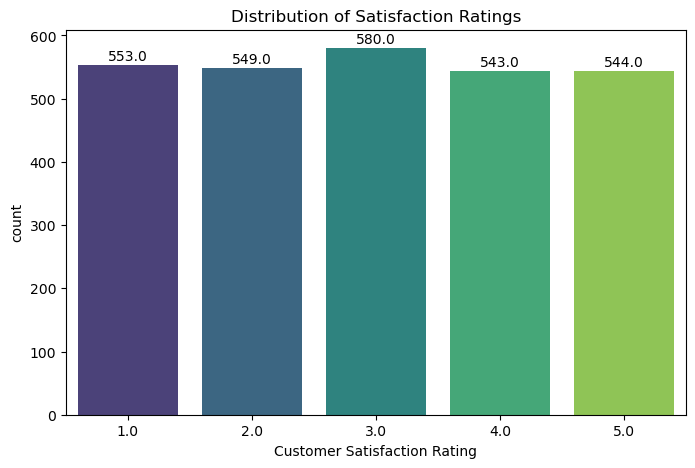

In [125]:
# Exploratory Data Analysis
plt.figure(figsize=(8,5))
ax = sns.countplot(x='Customer Satisfaction Rating', data=cs_data, palette='viridis')
plt.title("Distribution of Satisfaction Ratings")
# Add exact count labels
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0,12),
                textcoords='offset points')

plt.show()

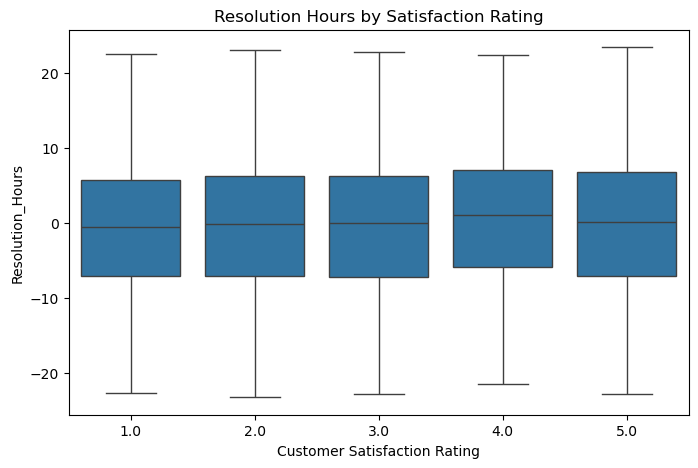

In [126]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Customer Satisfaction Rating', y='Resolution_Hours', data=cs_data)
plt.title("Resolution Hours by Satisfaction Rating")
plt.show()

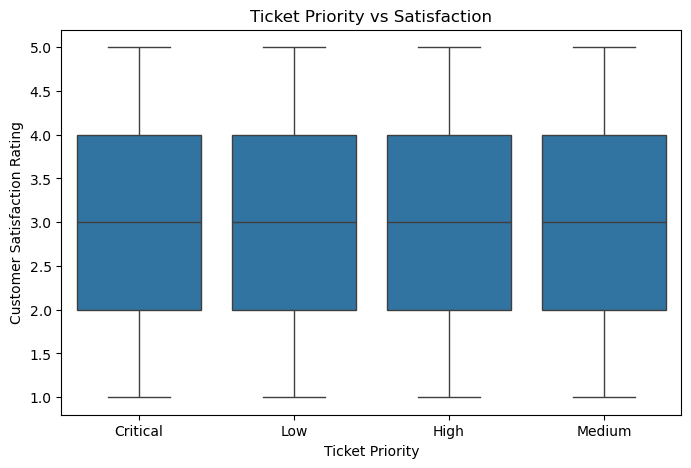

In [127]:
# 3. Ticket Priority vs Satisfaction
plt.figure(figsize=(8,5))
sns.boxplot(x='Ticket Priority', y='Customer Satisfaction Rating', data=cs_data)
plt.title("Ticket Priority vs Satisfaction")
plt.show()

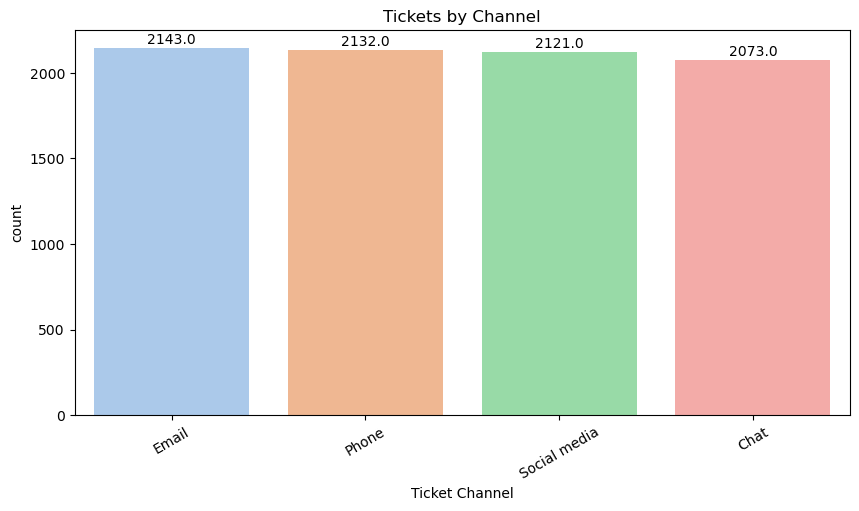

In [128]:
# 4. Ticket Channel distribution
plt.figure(figsize=(10,5))
t = sns.countplot(x='Ticket Channel', data=cs_data, order=cs_data['Ticket Channel'].value_counts().index, palette='pastel')
plt.title("Tickets by Channel")
plt.xticks(rotation=30)
# Add exact count labels
for p in t.patches:
    t.annotate(f'\n{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0,12),
                textcoords='offset points')
plt.show()

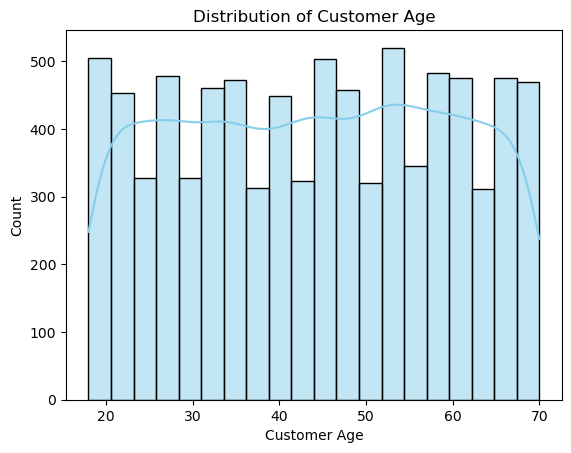

In [129]:
sns.histplot(cs_data['Customer Age'], kde=True, color='skyblue', bins=20)
plt.title('Distribution of Customer Age')
plt.show()

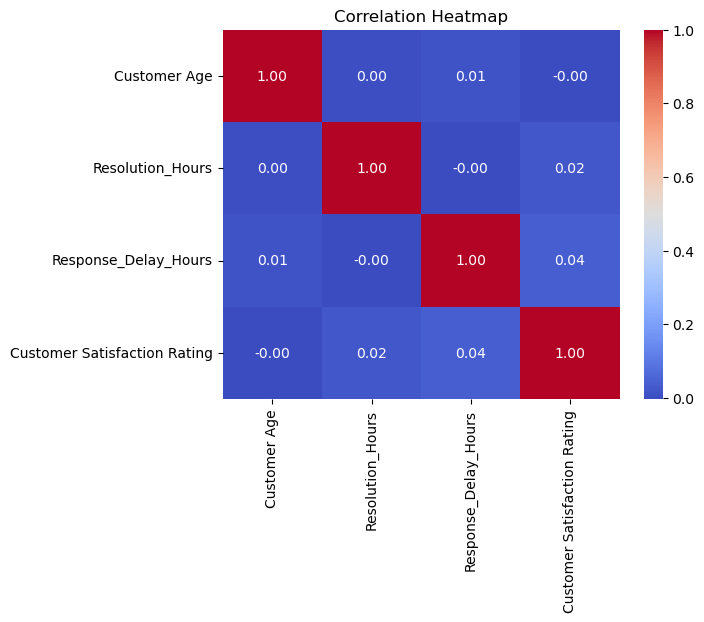

In [130]:
numeric_cols = ['Customer Age', 'Resolution_Hours', 'Response_Delay_Hours', 'Customer Satisfaction Rating']
corr = cs_data[numeric_cols].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

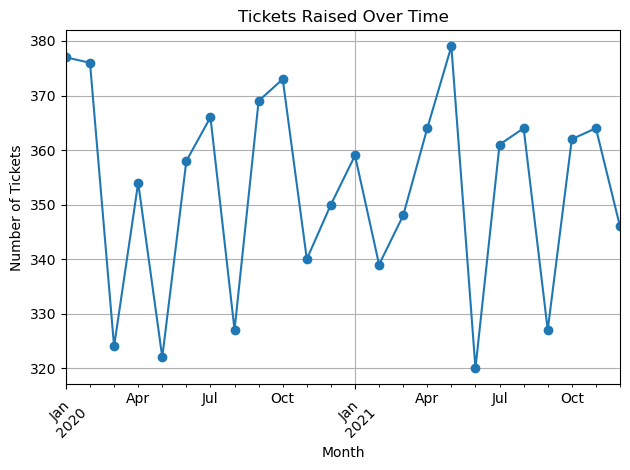

In [131]:
monthly_tickets = cs_data.copy()
monthly_tickets['YearMonth'] = monthly_tickets['Date of Purchase'].dt.to_period('M')
trend = monthly_tickets.groupby('YearMonth').size()

trend.plot(marker='o')
plt.title('Tickets Raised Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Tickets')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [132]:
for gender in cs_data['Customer Gender'].unique():
    top_items = cs_data[cs_data['Customer Gender'] == gender]['Product Purchased'].value_counts().head(5)
    print(f"\n Top 5 Products for Gender: {gender}")
    print(top_items)


 Top 5 Products for Gender: Other
Product Purchased
Canon EOS              86
Roomba Robot Vacuum    80
LG Smart TV            76
Nest Thermostat        75
Philips Hue Lights     73
Name: count, dtype: int64

 Top 5 Products for Gender: Female
Product Purchased
Dyson Vacuum Cleaner    80
Canon EOS               79
GoPro Hero              79
Amazon Echo             79
Canon DSLR Camera       78
Name: count, dtype: int64

 Top 5 Products for Gender: Male
Product Purchased
Google Nest           82
GoPro Hero            82
Google Pixel          81
Sony Xperia           80
Philips Hue Lights    78
Name: count, dtype: int64


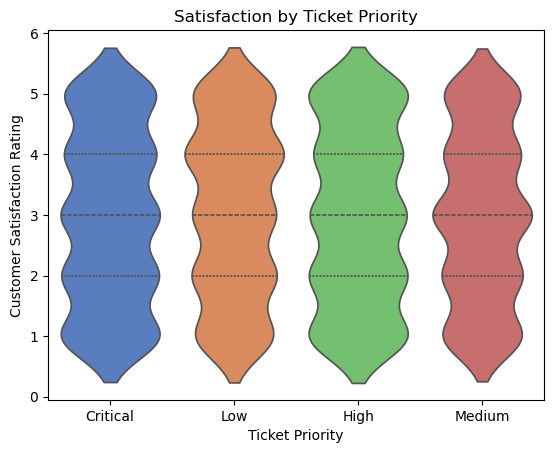

In [133]:
sns.violinplot(x='Ticket Priority', y='Customer Satisfaction Rating', data=cs_data, inner='quartile', palette='muted')
plt.title("Satisfaction by Ticket Priority")
plt.show()

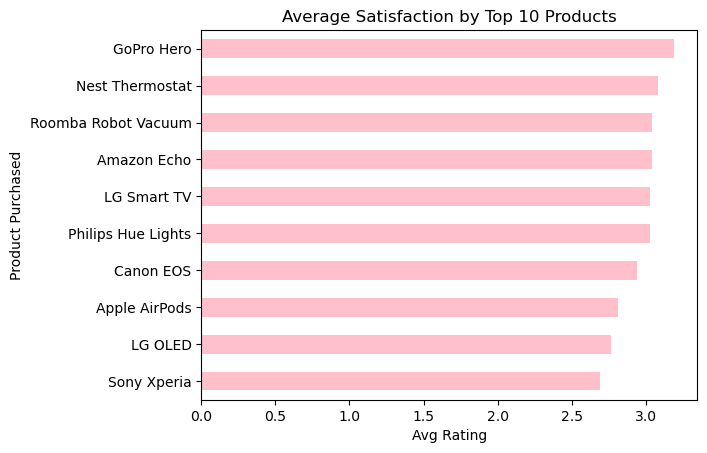

In [134]:
# Average Satisfaction by Product

top_products = cs_data['Product Purchased'].value_counts().head(10).index
product_df = cs_data[cs_data['Product Purchased'].isin(top_products)]

avg_satisfaction = product_df.groupby('Product Purchased')['Customer Satisfaction Rating'].mean().sort_values()

avg_satisfaction.plot(kind='barh', color='pink')
plt.title("Average Satisfaction by Top 10 Products")
plt.xlabel("Avg Rating")
plt.show()

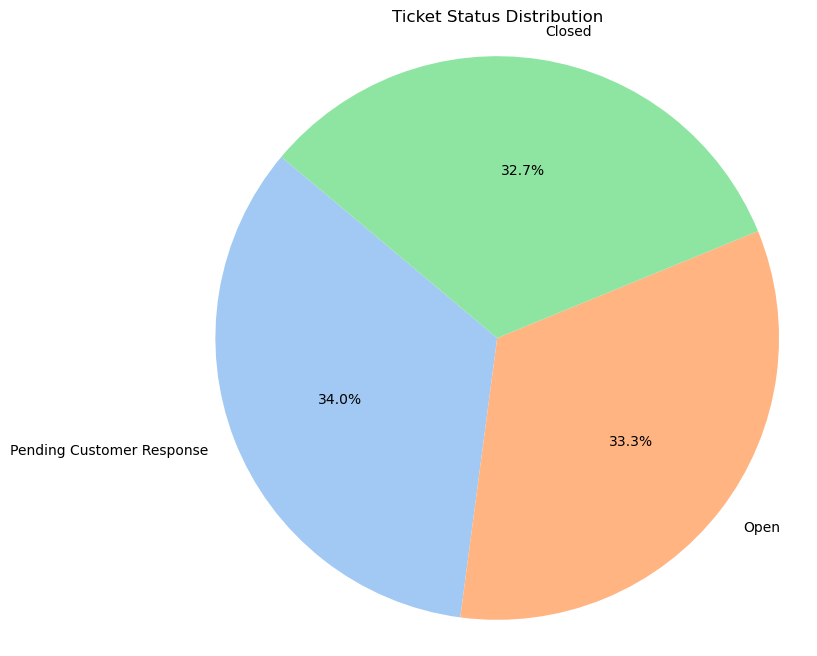

In [135]:
ticket_status_distribution = cs_data['Ticket Status'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(ticket_status_distribution, labels=ticket_status_distribution.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=140)
plt.title('Ticket Status Distribution')
plt.axis('equal')
plt.show()

In [136]:
cs_data.info

<bound method DataFrame.info of       Ticket ID        Customer Name              Customer Email  \
0             1        Marisa Obrien  carrollallison@example.com   
1             2         Jessica Rios    clarkeashley@example.com   
2             3  Christopher Robbins   gonzalestracy@example.com   
3             4     Christina Dillon    bradleyolson@example.org   
4             5    Alexander Carroll     bradleymark@example.com   
...         ...                  ...                         ...   
8464       8465           David Todd          adam28@example.net   
8465       8466           Lori Davis       russell68@example.com   
8466       8467      Michelle Kelley        ashley83@example.org   
8467       8468     Steven Rodriguez         fpowell@example.org   
8468       8469      Steven Davis MD          lori20@example.net   

      Customer Age Customer Gender       Product Purchased Date of Purchase  \
0               32           Other              GoPro Hero       2021-03

In [137]:
cs_data

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating,Resolution_Hours,Response_Delay_Hours
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaT,NaN,0.166667,19236.260000
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaT,NaN,0.166667,17776.760556
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0,6.850000,25259.243889
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0,-5.533333,22327.494444
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0,19.683333,29112.211667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8464,8465,David Todd,adam28@example.net,22,Female,LG OLED,2021-12-08,Product inquiry,Installation support,My {product_purchased} is making strange noise...,Open,NaN,Low,Phone,NaT,NaT,NaN,0.166667,21273.225972
8465,8466,Lori Davis,russell68@example.com,27,Female,Bose SoundLink Speaker,2020-02-22,Technical issue,Refund request,I'm having an issue with the {product_purchase...,Open,NaN,Critical,Email,NaT,NaT,NaN,0.166667,21273.225972
8466,8467,Michelle Kelley,ashley83@example.org,57,Female,GoPro Action Camera,2021-08-17,Technical issue,Account access,I'm having an issue with the {product_purchase...,Closed,Eight account century nature kitchen.,High,Social media,2023-06-01 09:44:22,2023-06-01 04:31:22,3.0,-5.216667,15681.739444
8467,8468,Steven Rodriguez,fpowell@example.org,54,Male,PlayStation,2021-10-16,Product inquiry,Payment issue,I'm having an issue with the {product_purchase...,Closed,We seat culture plan.,Medium,Email,2023-06-01 18:28:24,2023-06-01 05:32:24,3.0,-12.933333,14250.473333


In [138]:
# Feature Engineering

categorical_cols = ['Customer Gender', 'Product Purchased', 'Ticket Type',
                    'Ticket Status', 'Ticket Priority', 'Ticket Channel']

# Save encoders if you want to inverse transform later
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    cs_data[col] = le.fit_transform(cs_data[col].astype(str))
    label_encoders[col] = le

print("\n Label encoding complete.")


 Label encoding complete.


In [141]:
cs_data.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating,Resolution_Hours,Response_Delay_Hours
0,1,Marisa Obrien,carrollallison@example.com,32,2,16,2021-03-22,4,Product setup,I'm having an issue with the {product_purchase...,2,NaN,0,3,2023-06-01 12:15:36,NaT,NaN,0.166667,19236.260000
1,2,Jessica Rios,clarkeashley@example.com,42,0,21,2021-05-22,4,Peripheral compatibility,I'm having an issue with the {product_purchase...,2,NaN,0,0,2023-06-01 16:45:38,NaT,NaN,0.166667,17776.760556
2,3,Christopher Robbins,gonzalestracy@example.com,48,2,10,2020-07-14,4,Network problem,I'm facing a problem with my {product_purchase...,0,Case maybe show recently my computer follow.,2,3,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0,6.850000,25259.243889
3,4,Christina Dillon,bradleyolson@example.org,27,0,25,2020-11-13,0,Account access,I'm having an issue with the {product_purchase...,0,Try capital clearly never color toward story.,2,3,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0,-5.533333,22327.494444
4,5,Alexander Carroll,bradleymark@example.com,67,0,5,2020-02-04,0,Data loss,I'm having an issue with the {product_purchase...,0,West decision evidence bit.,2,1,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0,19.683333,29112.211667


In [142]:
# Convert string codes to numeric
num_code_cols = ['Customer Gender', 'Product Purchased', 'Ticket Type',
                 'Ticket Status', 'Ticket Priority', 'Ticket Channel']

for col in num_code_cols:
    cs_data[col] = pd.to_numeric(cs_data[col], errors='coerce')
    

# Encode categorical text columns
label_cols = ['Ticket Subject', 'Ticket Description', 'Resolution']
label_encoders = {}

for col in label_cols:
    cs_data[col] = cs_data[col].fillna("Unknown")
    le = LabelEncoder()
    cs_data[col] = le.fit_transform(cs_data[col])
    label_encoders[col] = le


# Customer Name Features
cs_data['Name_Length'] = cs_data['Customer Name'].apply(lambda x: len(str(x)))
cs_data['Name_Initial'] = cs_data['Customer Name'].str[0].str.upper().fillna('Unknown')
name_initial_le = LabelEncoder()
cs_data['Name_Initial_Encoded'] = name_initial_le.fit_transform(cs_data['Name_Initial'])
label_encoders['Name_Initial'] = name_initial_le

cs_data['Customer_Repeat_Count'] = cs_data['Customer Name'].map(cs_data['Customer Name'].value_counts())


# Email Features
cs_data['Email_Domain'] = cs_data['Customer Email'].str.split('@').str[-1].fillna('Unknown')
email_domain_le = LabelEncoder()
cs_data['Email_Domain_Encoded'] = email_domain_le.fit_transform(cs_data['Email_Domain'])
label_encoders['Email_Domain'] = email_domain_le
cs_data['Email_Length'] = cs_data['Customer Email'].apply(lambda x: len(str(x)))


# Ticket Subject
cs_data['Ticket Subject'] = cs_data['Ticket Subject'].fillna('Unknown')
cs_data['Ticket_Subject_Label'] = LabelEncoder().fit_transform(cs_data['Ticket Subject'])


# Ticket Description
cs_data['Desc_Length'] = cs_data['Ticket Description'].apply(lambda x: len(str(x)))


# Resolution presence
cs_data['Has_Resolution'] = cs_data['Resolution'].notna().astype(int)

print(" All text features encoded and transformed.")


cs_data = cs_data[cs_data['Customer Satisfaction Rating'].notna()]
cs_data = cs_data[np.isfinite(cs_data['Customer Satisfaction Rating'])]
cs_data['Customer Satisfaction Rating'] = cs_data['Customer Satisfaction Rating'].astype(int)


print("Ready columns:", cs_data.columns)
print("Dtypes:\n", cs_data.dtypes)

 All text features encoded and transformed.
Ready columns: Index(['Ticket ID', 'Customer Name', 'Customer Email', 'Customer Age',
       'Customer Gender', 'Product Purchased', 'Date of Purchase',
       'Ticket Type', 'Ticket Subject', 'Ticket Description', 'Ticket Status',
       'Resolution', 'Ticket Priority', 'Ticket Channel',
       'First Response Time', 'Time to Resolution',
       'Customer Satisfaction Rating', 'Resolution_Hours',
       'Response_Delay_Hours', 'Name_Length', 'Name_Initial',
       'Name_Initial_Encoded', 'Customer_Repeat_Count', 'Email_Domain',
       'Email_Domain_Encoded', 'Email_Length', 'Ticket_Subject_Label',
       'Desc_Length', 'Has_Resolution'],
      dtype='object')
Dtypes:
 Ticket ID                                int64
Customer Name                           object
Customer Email                          object
Customer Age                             int64
Customer Gender                          int64
Product Purchased                        in

In [143]:
cs_data.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,...,Name_Length,Name_Initial,Name_Initial_Encoded,Customer_Repeat_Count,Email_Domain,Email_Domain_Encoded,Email_Length,Ticket_Subject_Label,Desc_Length,Has_Resolution
2,3,Christopher Robbins,gonzalestracy@example.com,48,2,10,2020-07-14,4,8,189,...,19,C,2,1,example.com,0,25,8,3,1
3,4,Christina Dillon,bradleyolson@example.org,27,0,25,2020-11-13,0,0,1971,...,16,C,2,1,example.org,2,24,0,4,1
4,5,Alexander Carroll,bradleymark@example.com,67,0,5,2020-02-04,0,3,636,...,17,A,0,1,example.com,0,23,3,3,1
10,11,Joseph Moreno,mbrown@example.org,48,1,30,2021-01-19,1,3,3988,...,13,J,9,1,example.org,2,18,3,4,1
11,12,Brandon Arnold,davisjohn@example.net,51,1,27,2021-10-24,2,15,1206,...,14,B,1,1,example.net,1,21,15,4,1


In [144]:
cs_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2769 entries, 2 to 8467
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Ticket ID                     2769 non-null   int64         
 1   Customer Name                 2769 non-null   object        
 2   Customer Email                2769 non-null   object        
 3   Customer Age                  2769 non-null   int64         
 4   Customer Gender               2769 non-null   int64         
 5   Product Purchased             2769 non-null   int64         
 6   Date of Purchase              2769 non-null   datetime64[ns]
 7   Ticket Type                   2769 non-null   int64         
 8   Ticket Subject                2769 non-null   int64         
 9   Ticket Description            2769 non-null   int64         
 10  Ticket Status                 2769 non-null   int64         
 11  Resolution                    2769 

In [170]:
cs_data.head()

,Ticket ID,Customer Age,Customer Gender,Product Purchased,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,...,Response_Delay_Hours,Name_Length,Name_Initial_Encoded,Customer_Repeat_Count,Email_Domain_Encoded,Email_Length,Ticket_Subject_Label,Desc_Length,Has_Resolution,Satisfaction_Binary
2,3,48,2,10,4,8,189,0,343,2,...,25259.243889,19,2,1,0,25,8,3,1,0
3,4,27,0,25,0,0,1971,0,2549,2,...,22327.494444,16,2,1,2,24,0,4,1,0
4,5,67,0,5,0,3,636,0,2658,2,...,29112.211667,17,0,1,0,23,3,3,1,0
10,11,48,1,30,1,3,3988,0,1368,1,...,20729.780278,13,9,1,2,18,3,4,1,0
11,12,51,1,27,2,15,1206,0,1366,1,...,14052.097500,14,1,1,1,21,15,4,1,0


In [183]:
# Define binary target
cs_data['Satisfaction_Binary'] = cs_data['Customer Satisfaction Rating'].apply(lambda x: 1 if x >= 4 else 0)

# Define final features 
features = [
    'Customer Age', 'Customer Gender', 'Product Purchased', 'Ticket Type',
    'Ticket Status', 'Ticket Priority', 'Ticket Channel',
    'Name_Length', 'Name_Initial_Encoded', 'Customer_Repeat_Count',
    'Email_Length', 'Email_Domain_Encoded',
    'Ticket_Subject_Label', 'Desc_Length', 'Has_Resolution',
    'Resolution_Hours', 'Response_Delay_Hours'
]

# Create X and y
X = cs_data[features]
y = cs_data['Satisfaction_Binary']

# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)

In [181]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
preds = xgb_model.predict(X_test)

# Evaluate
print(" XGBoost Binary Accuracy:", accuracy_score(y_test, preds))
print("\n Classification Report:\n", classification_report(y_test, preds))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, preds))

 XGBoost Binary Accuracy: 0.5555555555555556

 Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.73      0.67       421
           1       0.41      0.28      0.33       272

    accuracy                           0.56       693
   macro avg       0.51      0.51      0.50       693
weighted avg       0.53      0.56      0.54       693


 Confusion Matrix:
 [[308 113]
 [195  77]]


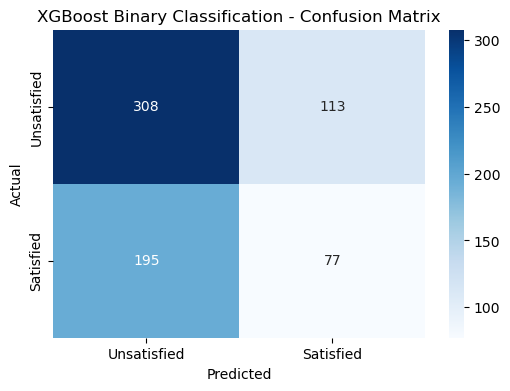

In [173]:
# confusion matrix
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Unsatisfied', 'Satisfied'], yticklabels=['Unsatisfied', 'Satisfied'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("XGBoost Binary Classification - Confusion Matrix")
plt.show()

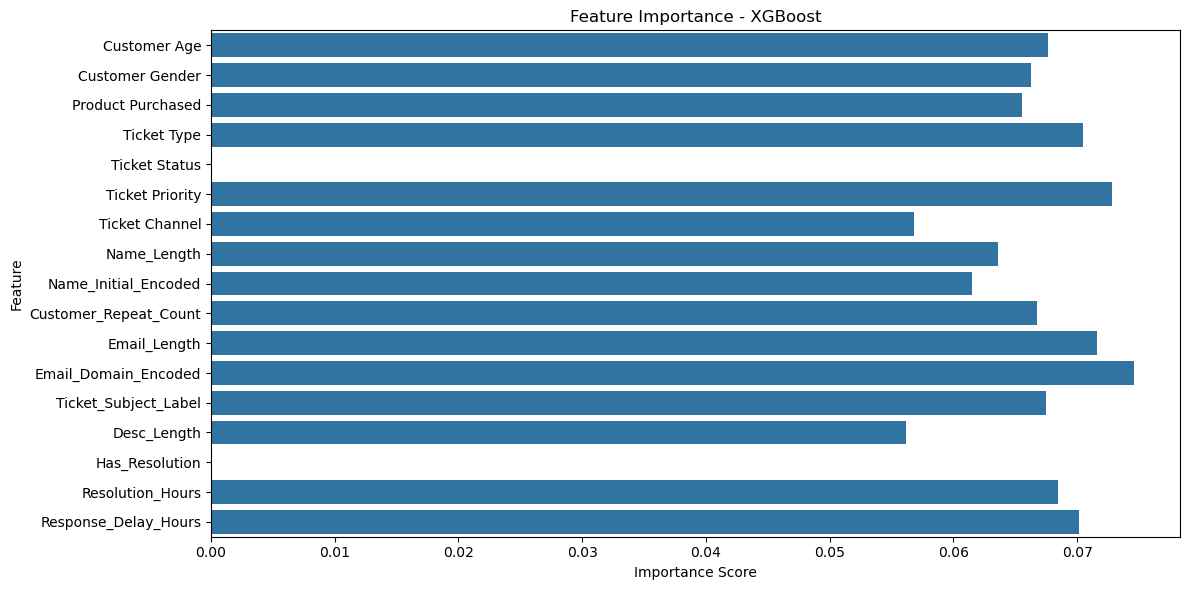

In [174]:
# feature importance
plt.figure(figsize=(12, 6))
importance = xgb_model.feature_importances_
sns.barplot(x=importance, y=features)
plt.title("Feature Importance - XGBoost")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [179]:
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

grid_search = GridSearchCV(xgb_clf, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

print("Best Params:", grid_search.best_params_)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best Params: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
